In [3]:
import pandas as pd


df_papers = pd.read_csv('data_ai_papers/ai_paper_author(no_more_than_6)_date_journal_conf.csv')
df_papers['date'] = pd.to_datetime(df_papers['date'], format='%Y-%m-%d')

In [4]:
print(f'Min date: {df_papers.date.min()}')
print(f'Max date: {df_papers.date.max()}')

Min date: 1800-01-01 00:00:00
Max date: 2022-06-01 00:00:00


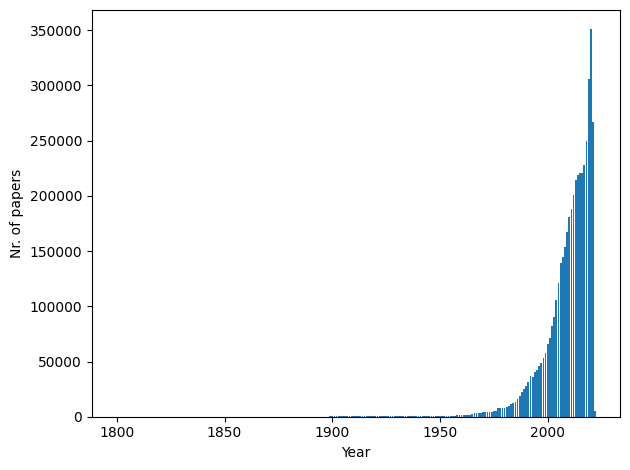

In [6]:
import matplotlib.pyplot as plt

df_years = df_papers.groupby(pd.Grouper(key='date', freq='Y')).size().reset_index(name='count')

plt.bar(df_years.date.dt.year, df_years['count'])
plt.xlabel('Year')
plt.ylabel('Nr. of papers')
plt.tight_layout()

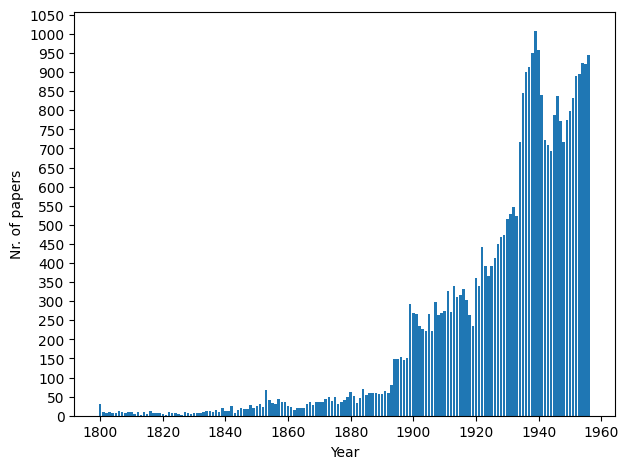

In [17]:
df_years_1950 = df_years[:157]

plt.bar(df_years_1950.date.dt.year, df_years_1950['count'])
plt.yticks(range(0, df_years_1950['count'].max() + 50, 50))
plt.xlabel('Year')
plt.ylabel('Nr. of papers')
plt.tight_layout()

In [55]:
from ast import literal_eval
import pandas as pd


df_paper_field = pd.read_csv('data_ai_papers/ai_paper_field.csv')
df_paper_field.dropna(subset='field1_name', inplace=True)
df_paper_field['field1_name'] = df_paper_field['field1_name'].apply(literal_eval)

fields = []

for i in df_paper_field['field1_name']:
    fields += i

len(set(fields))

291

# Prepare data for ScHoLP library

## Coauthorship data

In [48]:
import pandas as pd
from ast import literal_eval

for sampling in ['top', 'random']:
    # Read and preprocess data
    df = pd.read_csv('data_ai_papers/ai_paper_author(no_more_than_6)_date_journal_conf.csv', converters={f'author_list_{sampling}': literal_eval})
    df = df.loc[(df['author_count'] > 1) & (df['year'] >= 2000), [f'author_list_{sampling}' , 'author_count', 'year']]
    df[f'author_list_{sampling}'] = df[f'author_list_{sampling}'].apply(lambda cell: [int(x) for x in cell])
    df.sort_values('year', ascending=True, inplace=True)


    # Transform data to ScHoLP format
    #
    # Consider a dataset consisting of three simplices:
    #     1. {1, 2, 3} at time 10
    #     2. {2, 4} at time 15.
    #     3. {1, 3, 4, 5} at time 21.
    #
    # Then the data structure would be:
    #     - simplices = [1, 2, 3, 2, 4, 1, 3, 4, 5]
    #     - nverts = [3, 2, 4]
    #     - times = [10, 15, 21]
    simplices = []
    nverts = []
    times = []

    for (authors, author_count, year) in df.itertuples(index=False):
        simplices += authors
        nverts.append(len(authors))
        times.append(year)


    # Save data to required files
    with open(f'scholp/data/coauth-{sampling}-MAG-aipapers/coauth-{sampling}-MAG-aipapers-simplices.txt', 'w') as file:
        for item in simplices:
            file.write(f'{item}\n')

    with open(f'scholp/data/coauth-{sampling}-MAG-aipapers/coauth-{sampling}-MAG-aipapers-nverts.txt', 'w') as file:
        for item in nverts:
            file.write(f'{item}\n')

    with open(f'scholp/data/coauth-{sampling}-MAG-aipapers/coauth-{sampling}-MAG-aipapers-times.txt', 'w') as file:
        for item in times:
            file.write(f'{item}\n')


## Fields data

In [10]:
import pandas as pd
from ast import literal_eval

# Read and preprocess data
coauth = pd.read_csv('data_ai_papers/ai_paper_author(no_more_than_6)_date_journal_conf.csv')
coauth = coauth[['paperid', 'year']]

fields = pd.read_csv('data_ai_papers/ai_paper_field.csv', converters={'field1_id': literal_eval, 'field1_name': literal_eval})

fields = pd.merge(fields, coauth, on='paperid', how='inner')

fields = fields.loc[(fields['year'] >= 2000)]
fields['field1_id'] = fields['field1_id'].apply(lambda cell: [int(x) for x in cell])
fields.sort_values('year', ascending=True, inplace=True)


# Transform data to ScHoLP format
simplices = []
nverts = []
times = []

# Save data to required files
for (paperid, field0_id, field0_name, field1_id, field1_name, year) in fields.itertuples(index=False):
    simplices += field1_id
    nverts.append(len(field1_id))
    times.append(year)

with open('scholp/data/fields2-MAG-aipapers/fields2-MAG-aipapers-simplices.txt', 'w') as file:
    for item in simplices:
        file.write(f'{item}\n')

with open('scholp/data/fields2-MAG-aipapers/fields2-MAG-aipapers-nverts.txt', 'w') as file:
    for item in nverts:
        file.write(f'{item}\n')

with open('scholp/data/fields2-MAG-aipapers/fields2-MAG-aipapers-times.txt', 'w') as file:
    for item in times:
        file.write(f'{item}\n')